Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("D:/DATA SCIENCE/DATA SCIENCE ASSIGNMENTS/Assignments/Decision Tree/Company_data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df=data.copy()

In [6]:
df['ShelveLoc'].replace({'Bad':0,'Medium':1,'Good':2},inplace=True)
df['Urban'].replace({'No':0,'Yes':1},inplace=True)
df['US'].replace({'No':0,'Yes':1},inplace=True)

In [7]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1
396,6.14,139,23,3,37,120,1,55,11,0,1
397,7.41,162,26,12,368,159,1,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [8]:
x=df.iloc[:,1:]
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,1,55,11,0,1
397,162,26,12,368,159,1,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [9]:
y=df.iloc[:,0]
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [10]:
#spliting data into training and testing datasets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

## Decision Tree Regressor (CART)

In [11]:
model=DecisionTreeRegressor(max_depth=9)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [21]:
#model.feature_importances_*100

array([11.48955084,  4.06290691,  8.65519985,  2.05285602, 30.00293208,
       31.95697871,  6.49949601,  4.07855968,  0.41792544,  0.78359445])

In [12]:
#Find accuracy
model.score(x_test,y_test)

0.44392306907906676

In [13]:
model.score(x_train,y_train)   # training accuracy(Overfitted)

0.9864282401251606

In [14]:
#tree.plot_tree(model)

In [15]:
#predicting on test data
preds=model.predict(x_test)
preds

array([ 7.745     ,  9.54      ,  7.745     ,  4.42      ,  8.085     ,
       12.66      ,  8.99428571, 10.36      , 12.53      ,  7.59      ,
       13.36      ,  8.06      ,  4.76125   , 11.54      ,  8.61      ,
        6.69      , 13.14      ,  6.44      ,  8.16363636,  8.06      ,
        6.15142857,  6.08      ,  5.58333333,  5.55      , 12.61      ,
        6.81      ,  5.58      ,  8.44      ,  8.0625    ,  4.47333333,
        8.23      , 11.54      ,  8.        ,  8.78      , 10.5       ,
        5.51857143, 10.34      ,  5.47      ,  5.55      , 10.74      ,
        4.41666667,  4.42      ,  8.44      ,  9.63333333,  4.76125   ,
        9.5       ,  8.68      , 11.18      ,  6.15142857,  9.54      ,
        4.76125   ,  6.29      ,  4.41666667,  9.125     , 11.17      ,
       10.5       ,  9.71      ,  6.08      , 11.28      , 11.28      ,
        2.66      ,  7.78      ,  7.745     ,  5.04      ,  8.23      ,
        4.76125   ,  9.54      ,  7.09      ,  8.855     ,  6.33

In [16]:
y_test

94      8.39
32      6.20
225     6.68
157    10.21
356     3.58
       ...  
188     8.07
223     3.45
65      4.90
262     6.37
186     8.68
Name: Sales, Length: 80, dtype: float64

In [17]:
error=preds-y_test
error

94    -0.645
32     3.340
225    1.065
157   -5.790
356    4.505
       ...  
188   -2.755
223    1.360
65    -0.220
262   -0.560
186   -0.620
Name: Sales, Length: 80, dtype: float64

In [18]:
#mean_absolute_percentage_error
mape=np.mean(abs(error/y_test))*100
mape

inf

In [19]:
newdata=np.array([138,73,11,276,120,0,42,17,1,1]).reshape(1,-1)   #Take 1st point for prrediction
model.predict(newdata)

array([9.5])

## Build Decision Tree Classifier Entropy Criterion  (C5.0)

In [22]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


we will first convert "Sales" column in categorical variable

In [23]:
df1=df.copy()

In [24]:
from sklearn.preprocessing import Binarizer

In [25]:
bin=Binarizer(threshold=7.5)   #7.5=just take mean of "Sales" column

In [26]:
col=df1['Sales'].values
col=col.reshape(-1,1)
#col

In [27]:
bin.fit_transform(col)

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],

In [28]:
df1['Sales']=bin.fit_transform(col)

In [29]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1.0,138,73,11,276,120,0,42,17,1,1
1,1.0,111,48,16,260,83,2,65,10,1,1
2,1.0,113,35,10,269,80,1,59,12,1,1
3,0.0,117,100,4,466,97,1,55,14,1,1
4,0.0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,138,108,17,203,128,2,33,14,1,1
396,0.0,139,23,3,37,120,1,55,11,0,1
397,0.0,162,26,12,368,159,1,40,18,1,1
398,0.0,100,79,7,284,95,0,50,12,1,1


In [30]:
X=df1.iloc[:,1:]
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,1,55,11,0,1
397,162,26,12,368,159,1,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [31]:
Y=df1.iloc[:,0]
Y

0      1.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
395    1.0
396    0.0
397    0.0
398    0.0
399    1.0
Name: Sales, Length: 400, dtype: float64

In [34]:
#spliting data into training and testing datasets
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(X,Y,test_size=0.2,random_state=1)

In [37]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=9)  #by default it take gini criterion
model1.fit(X_TRAIN,Y_TRAIN)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

[Text(206.311095505618, 206.56799999999998, 'X[5] <= 1.5\nentropy = 1.0\nsamples = 320\nvalue = [162, 158]'),
 Text(115.44016853932585, 184.824, 'X[4] <= 105.5\nentropy = 0.969\nsamples = 250\nvalue = [151, 99]'),
 Text(41.379775280898876, 163.07999999999998, 'X[6] <= 54.5\nentropy = 0.914\nsamples = 85\nvalue = [28, 57]'),
 Text(26.332584269662924, 141.336, 'X[1] <= 47.5\nentropy = 0.422\nsamples = 35\nvalue = [3, 32]'),
 Text(18.808988764044944, 119.592, 'X[3] <= 252.5\nentropy = 0.985\nsamples = 7\nvalue = [3, 4]'),
 Text(11.285393258426968, 97.848, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(26.332584269662924, 97.848, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(33.8561797752809, 119.592, 'entropy = 0.0\nsamples = 28\nvalue = [0, 28]'),
 Text(56.426966292134836, 141.336, 'X[4] <= 86.5\nentropy = 1.0\nsamples = 50\nvalue = [25, 25]'),
 Text(48.90337078651686, 119.592, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(63.95056179775281, 119.592, 'X[0] <= 125.5\

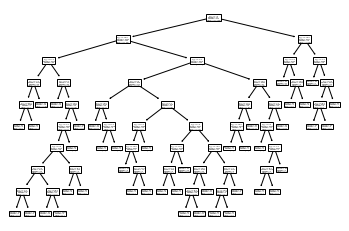

In [38]:
#plot the decision tree
tree.plot_tree(model1)

[Text(3056.4606741573034, 4590.4, 'ShelveLoc <= 1.5\nentropy = 1.0\nsamples = 320\nvalue = [162, 158]\nclass = YES(1)'),
 Text(1710.2247191011236, 4107.2, 'Price <= 105.5\nentropy = 0.969\nsamples = 250\nvalue = [151, 99]\nclass = YES(1)'),
 Text(613.0337078651686, 3624.0, 'Age <= 54.5\nentropy = 0.914\nsamples = 85\nvalue = [28, 57]\nclass = NO(0)'),
 Text(390.1123595505618, 3140.8, 'Income <= 47.5\nentropy = 0.422\nsamples = 35\nvalue = [3, 32]\nclass = NO(0)'),
 Text(278.65168539325845, 2657.6, 'Population <= 252.5\nentropy = 0.985\nsamples = 7\nvalue = [3, 4]\nclass = NO(0)'),
 Text(167.19101123595505, 2174.4, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = YES(1)'),
 Text(390.1123595505618, 2174.4, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = NO(0)'),
 Text(501.5730337078652, 2657.6, 'entropy = 0.0\nsamples = 28\nvalue = [0, 28]\nclass = NO(0)'),
 Text(835.9550561797753, 3140.8, 'Price <= 86.5\nentropy = 1.0\nsamples = 50\nvalue = [25, 25]\nclass = YES(1)'),
 Text(724

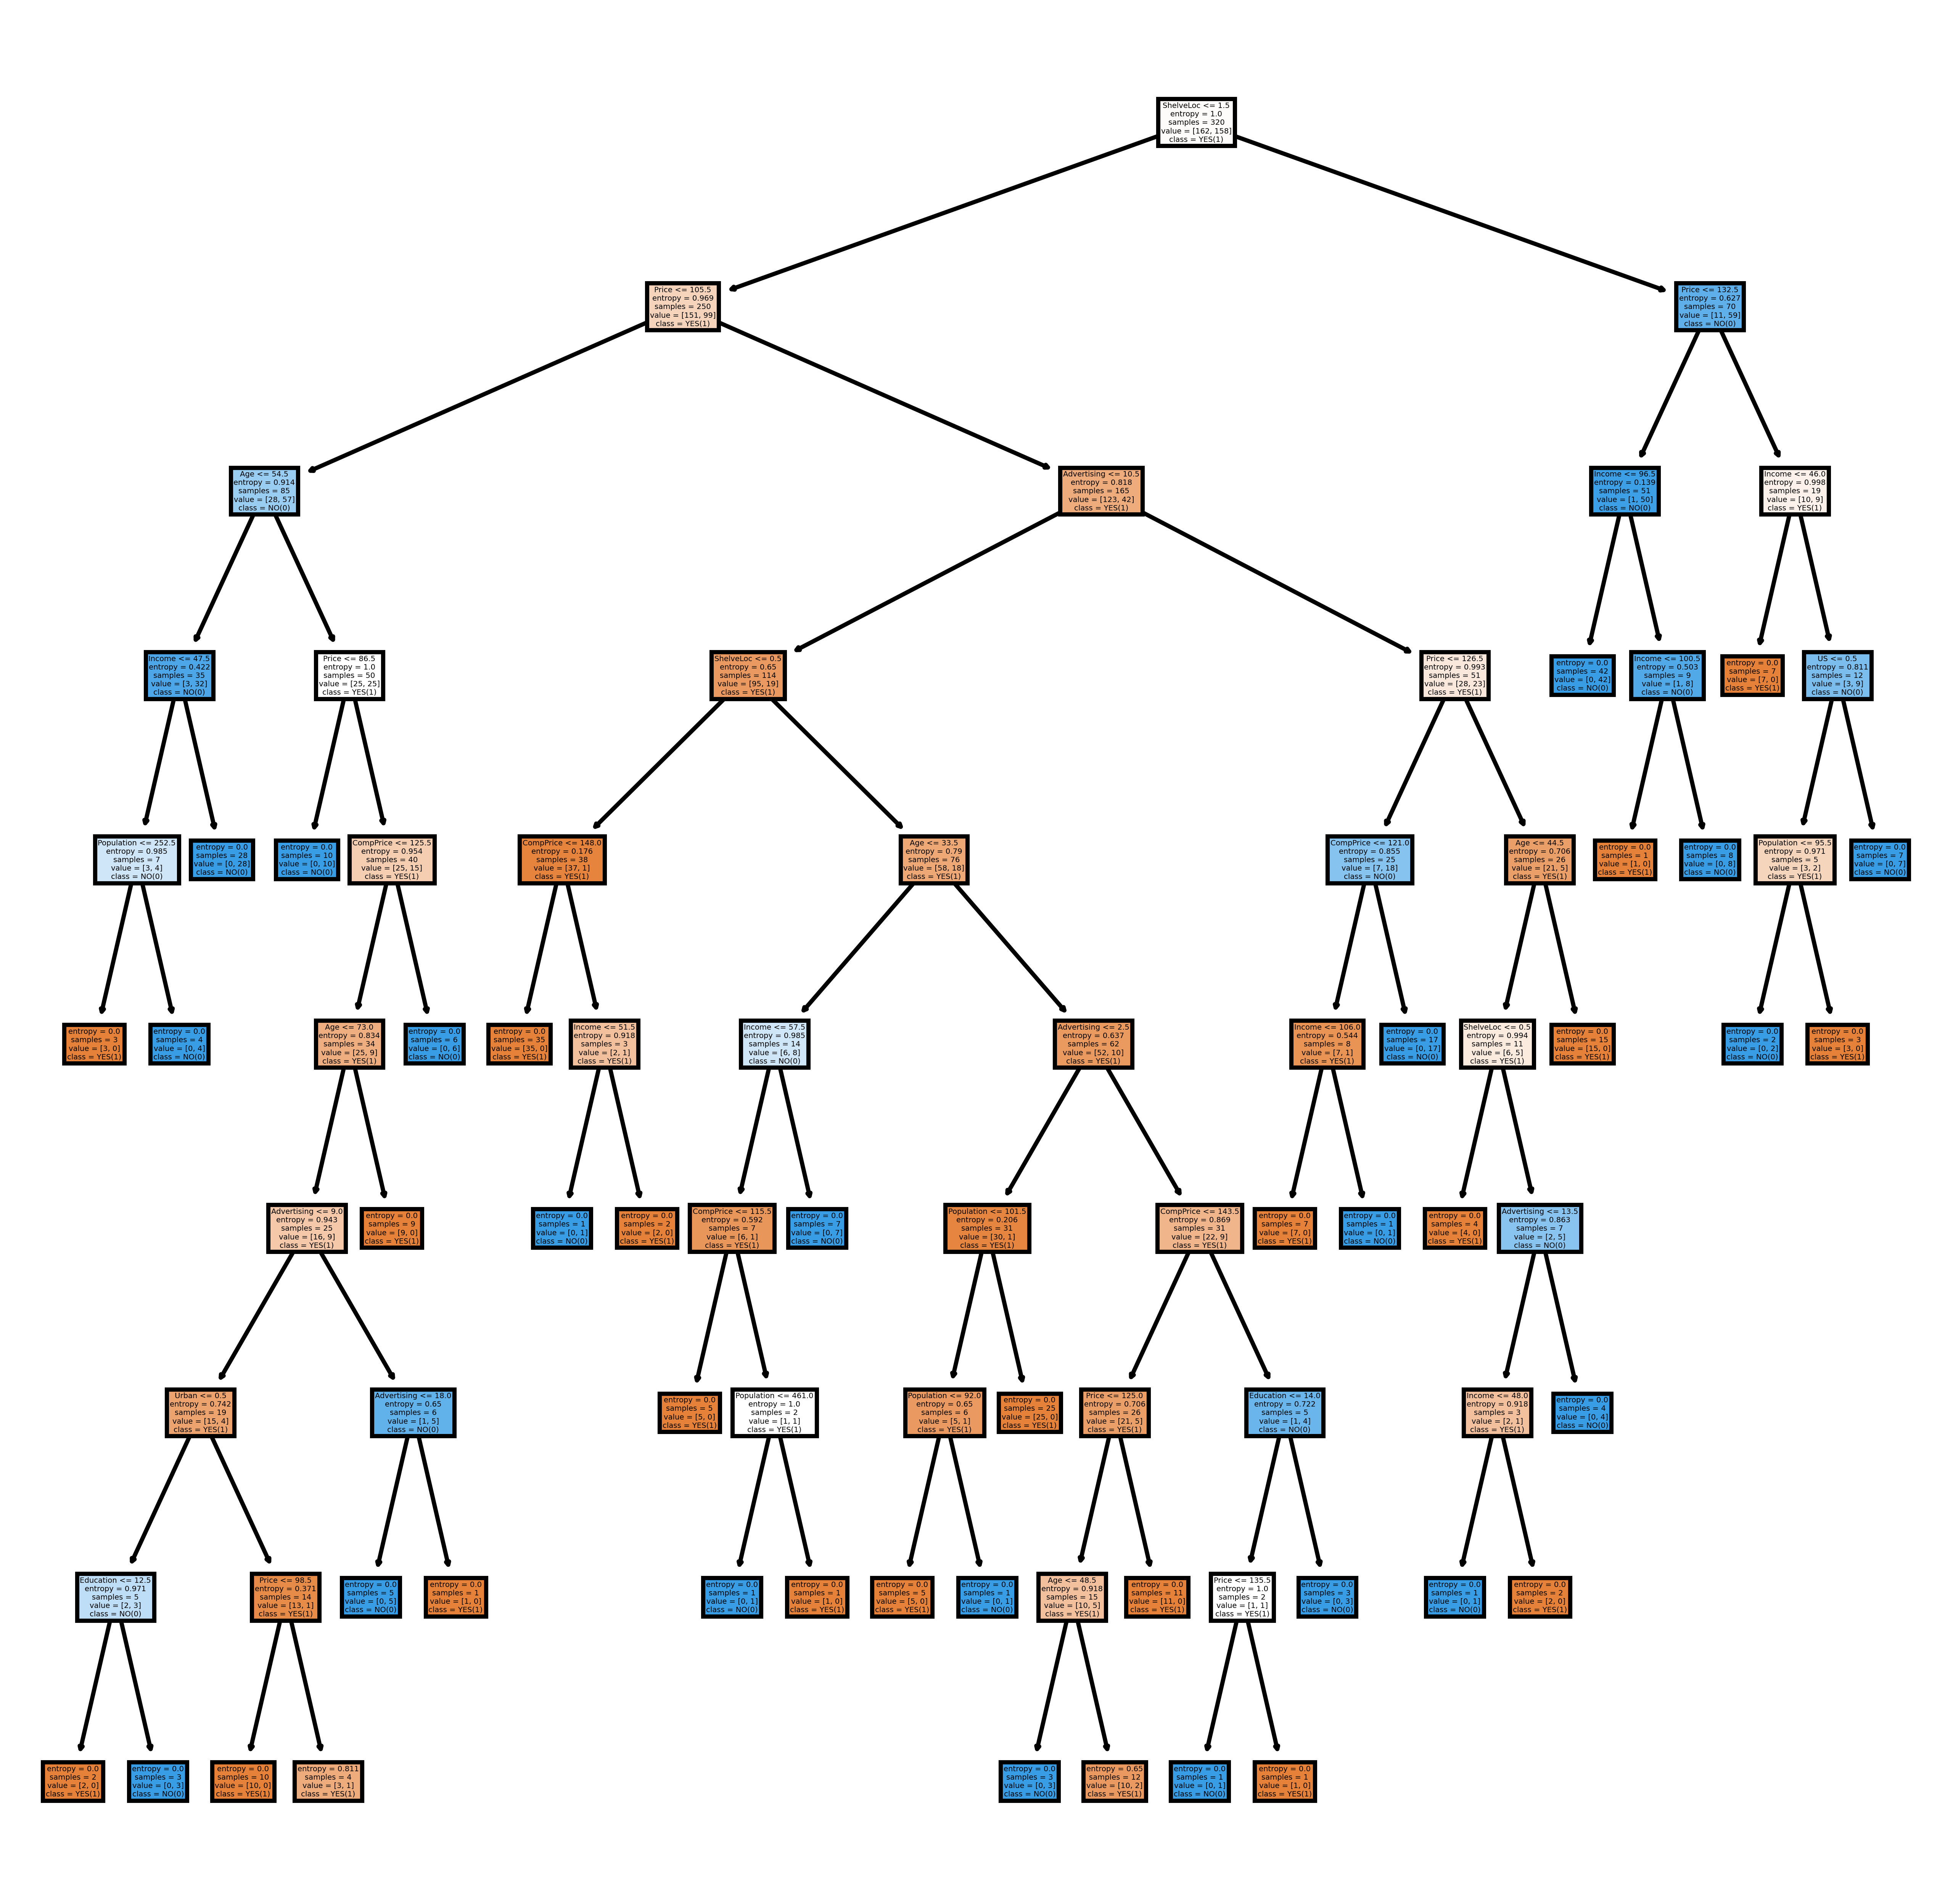

In [41]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['YES(1)','NO(0)']
fig, axes =plt.subplots(nrows=1,ncols=1,figsize=(8,8),dpi=800)  #dpi=display pixels
tree.plot_tree(model1,feature_names=fn,class_names=cn,filled=True)

In [43]:
# predicting on test data
preds1=model1.predict(X_TEST)
pd.Series(preds).value_counts()

0.0    40
1.0    40
dtype: int64

In [44]:
preds1

array([1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.])

In [45]:
Y_TEST

398    0.0
125    1.0
328    0.0
339    1.0
172    1.0
      ... 
347    0.0
41     1.0
180    0.0
132    1.0
224    0.0
Name: Sales, Length: 80, dtype: float64

In [46]:
pd.crosstab(Y_TEST,preds1) # getting the 2 way table to understand currect and wrong prediction

col_0,0.0,1.0
Sales,,
0.0,30,10
1.0,10,30


In [47]:
# Find Accuracy
np.mean(preds1==Y_TEST)

0.75

In [48]:
print(classification_report(preds1,Y_TEST))

              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75        40
         1.0       0.75      0.75      0.75        40

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.75        80
weighted avg       0.75      0.75      0.75        80



In [63]:
# For now data point
newdata=np.array([138,73,11,276,120,0,42,17,1,1]).reshape(1,-1)   #Take 1st point for prrediction
model1.predict(newdata)

array([1.])

# Build Decision Tree Classifier (CART) Gini criterion

In [52]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=9)
model_gini.fit(X_TRAIN,Y_TRAIN)

DecisionTreeClassifier(max_depth=9)

In [55]:
pred_gini=model_gini.predict(X_TEST)
pred_gini

array([1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.])

In [56]:
Y_TEST

398    0.0
125    1.0
328    0.0
339    1.0
172    1.0
      ... 
347    0.0
41     1.0
180    0.0
132    1.0
224    0.0
Name: Sales, Length: 80, dtype: float64

In [57]:
# Find accuracy
np.mean(pred_gini==Y_TEST)

0.7875

In [58]:
print(classification_report(pred_gini,Y_TEST))

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79        41
         1.0       0.78      0.79      0.78        39

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



In [62]:
# For now data point
newdata=np.array([138,73,11,276,120,0,42,17,1,1]).reshape(1,-1)   #Take 1st point for prrediction
model_gini.predict(newdata)

array([1.])